In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
plt.rcParams["figure.figsize"]=(30,10)
plt.rcParams['font.size']=20

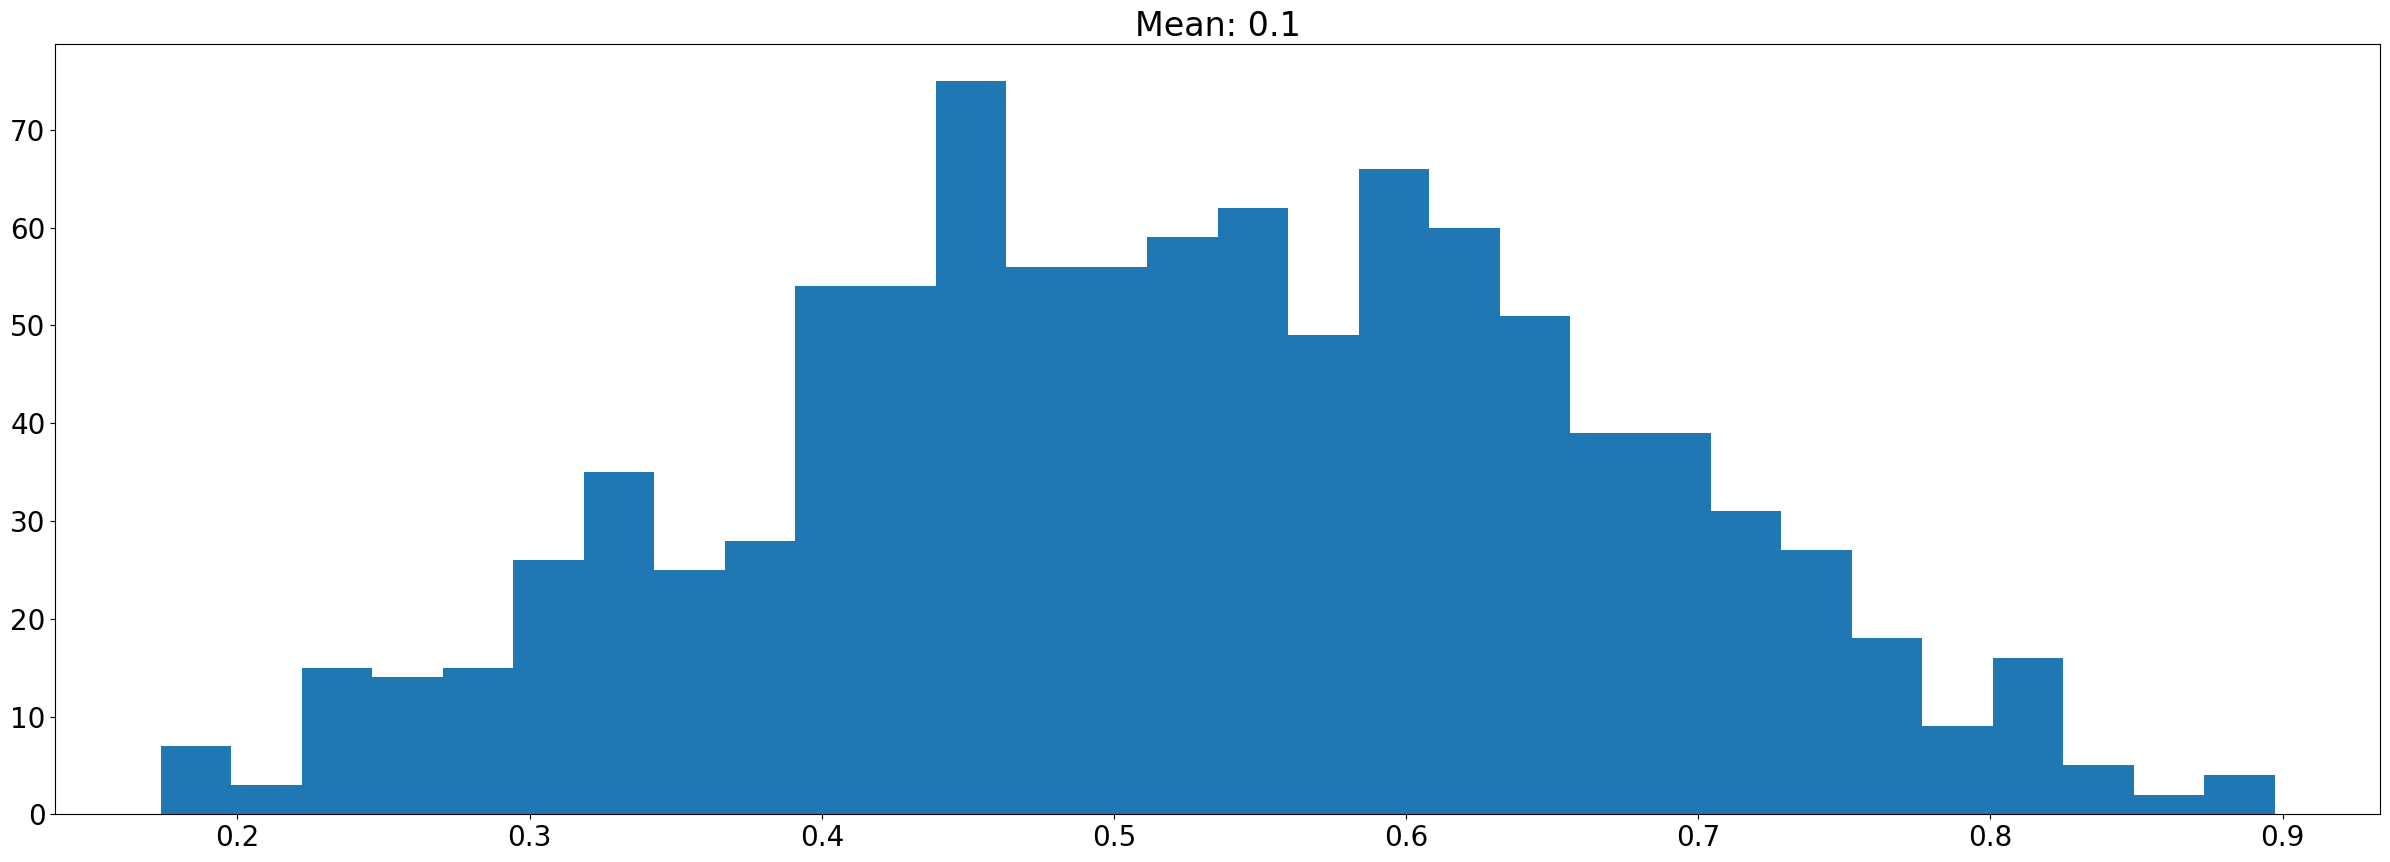

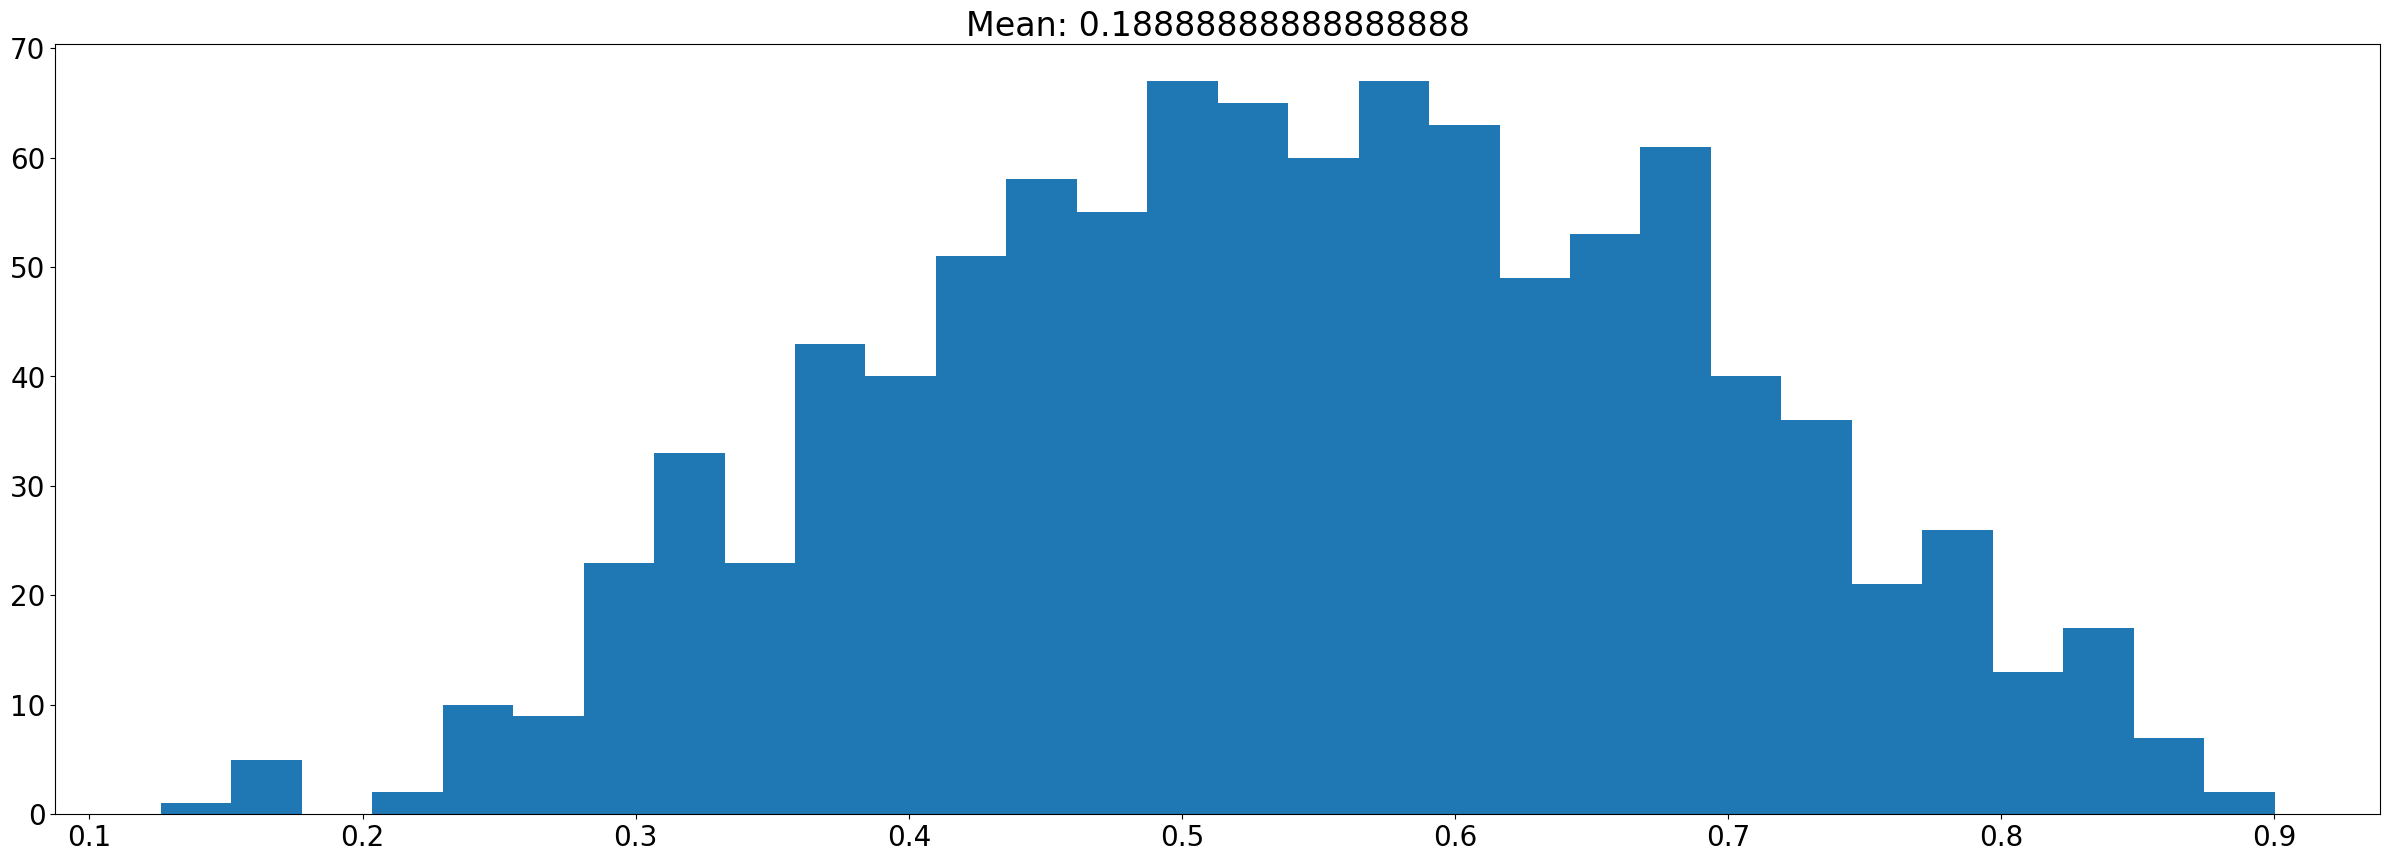

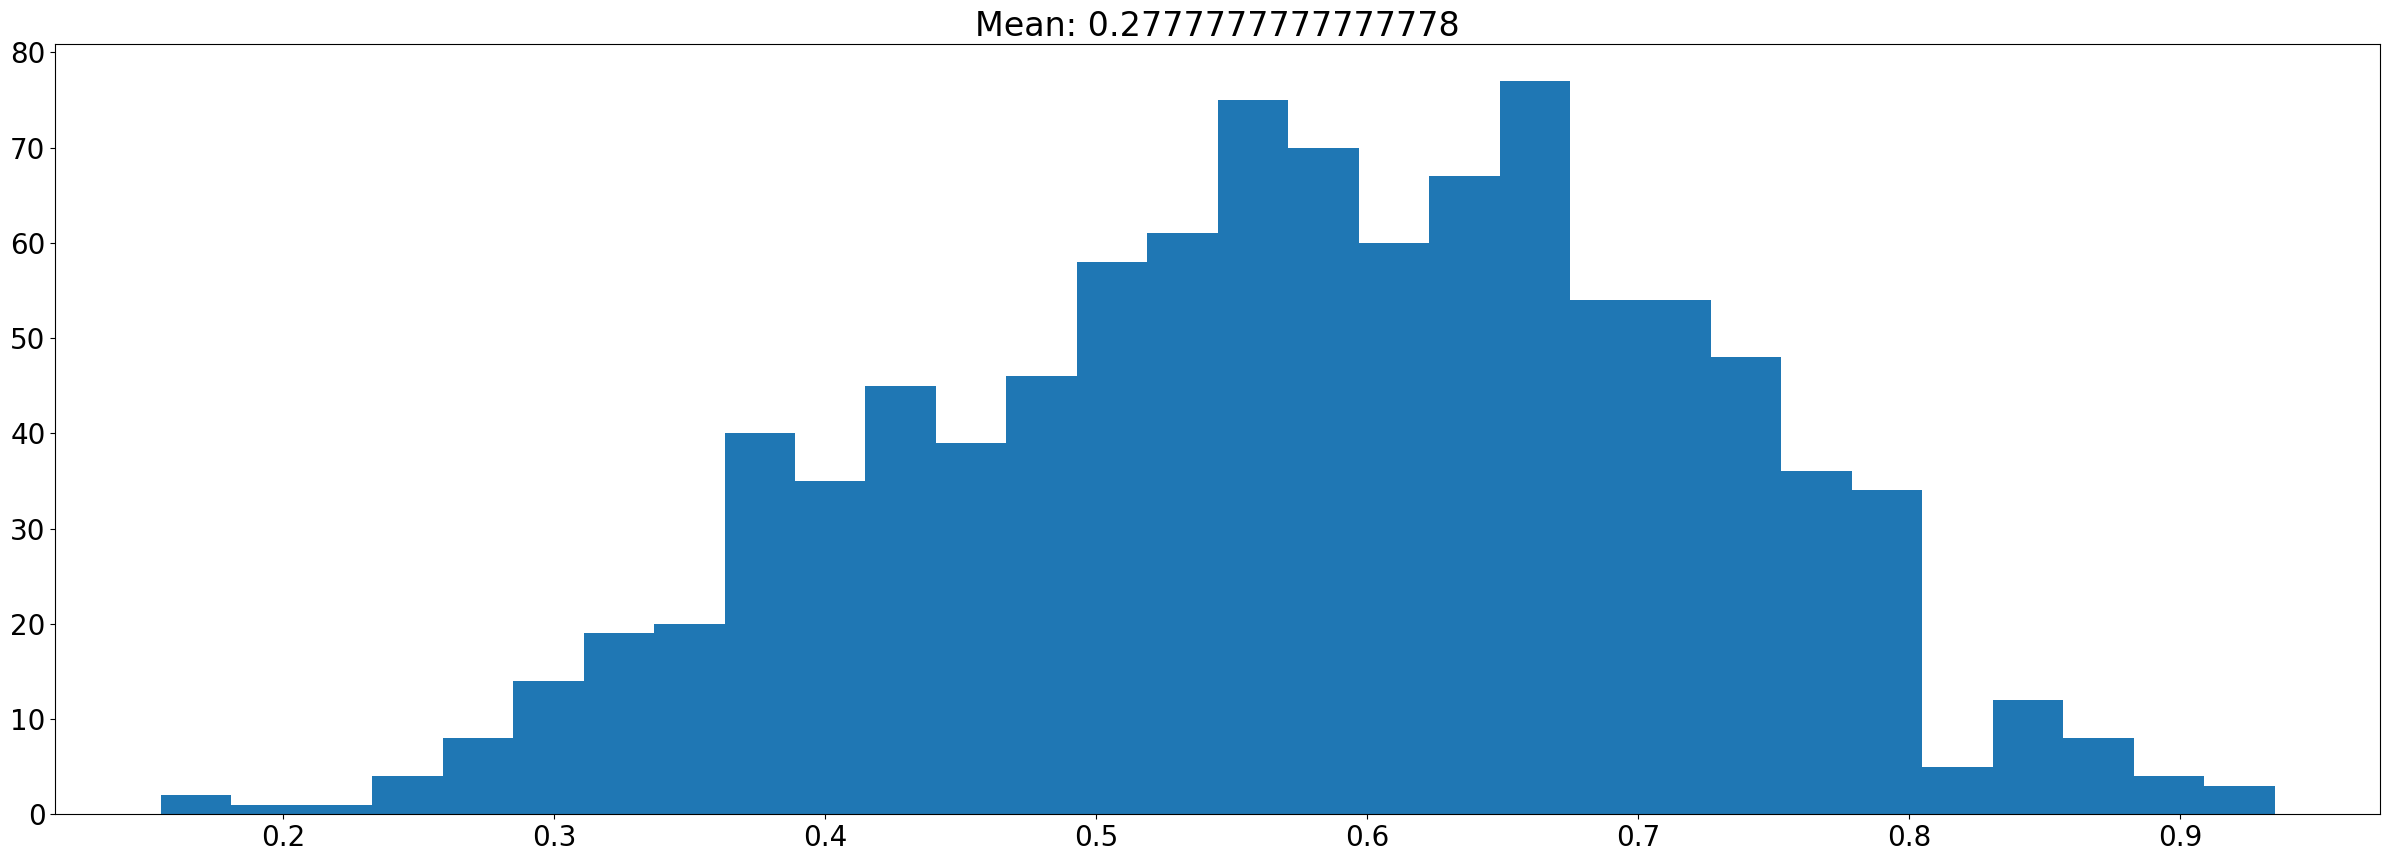

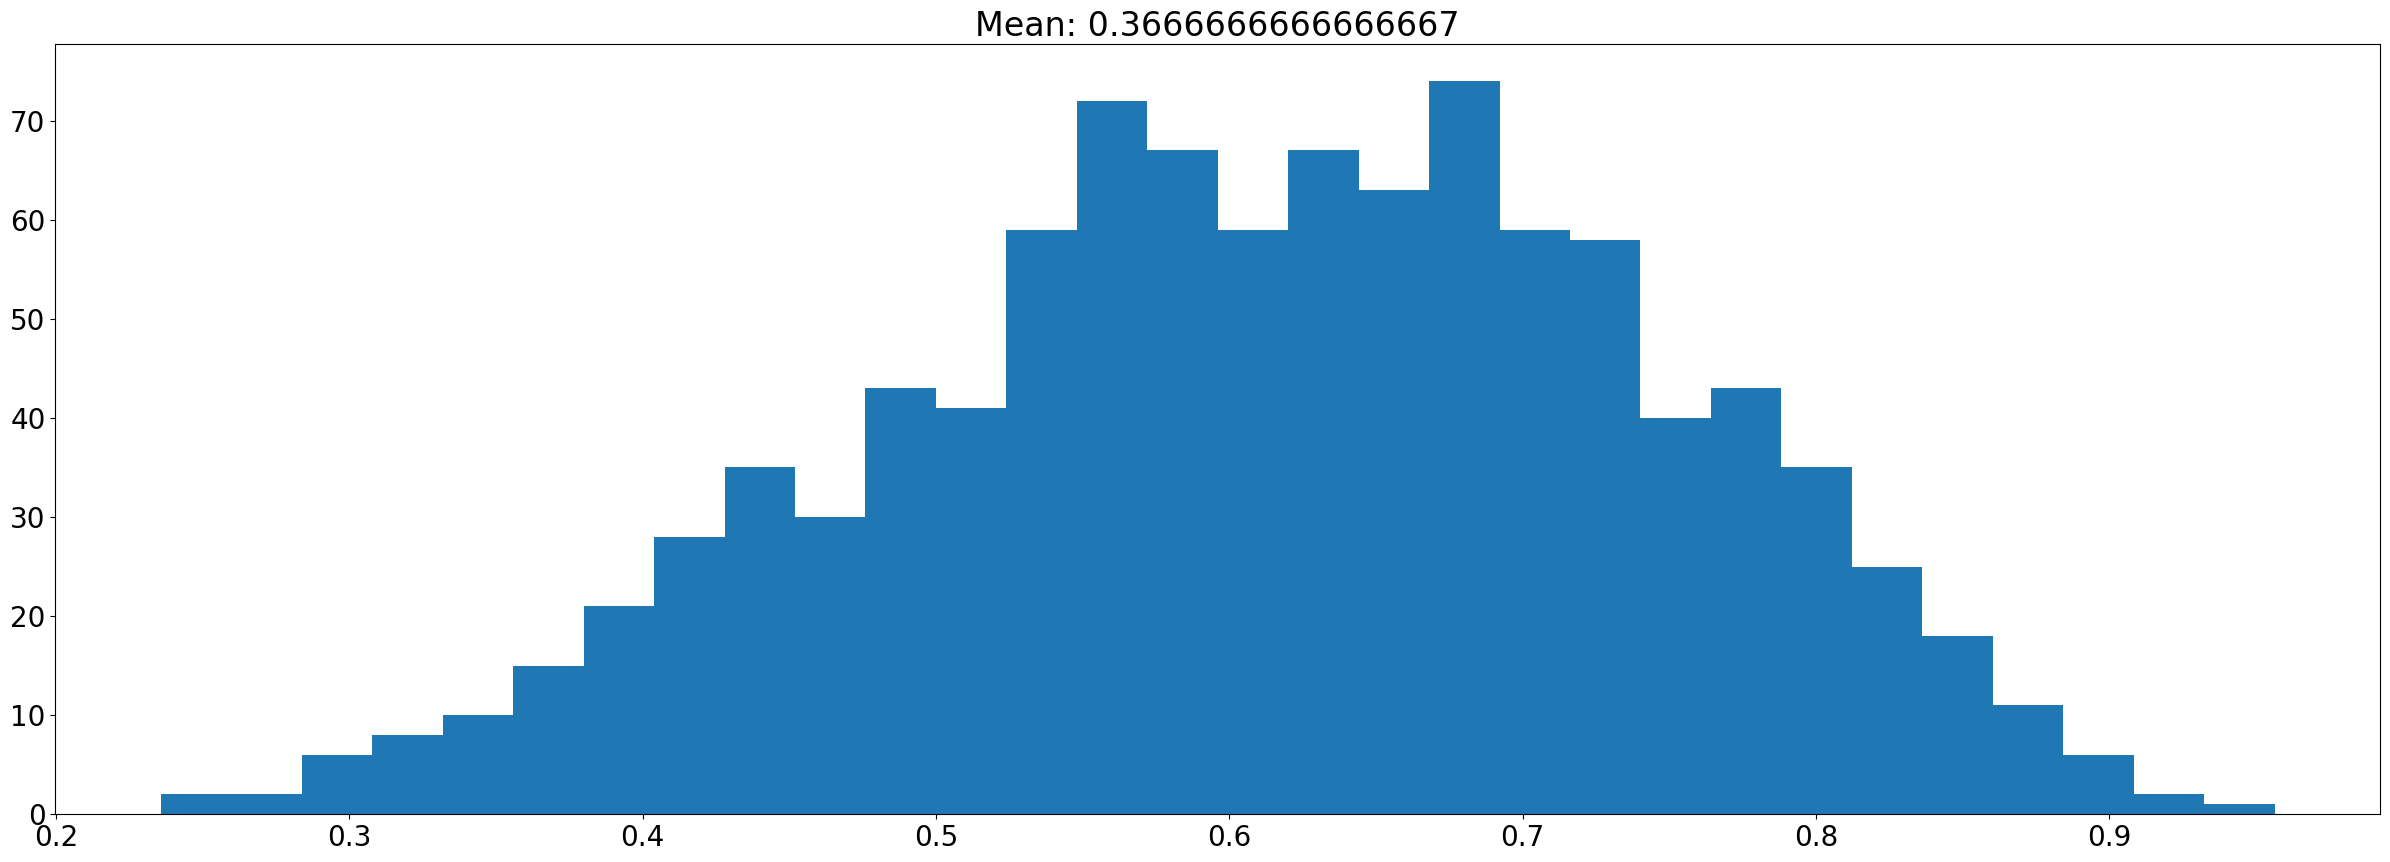

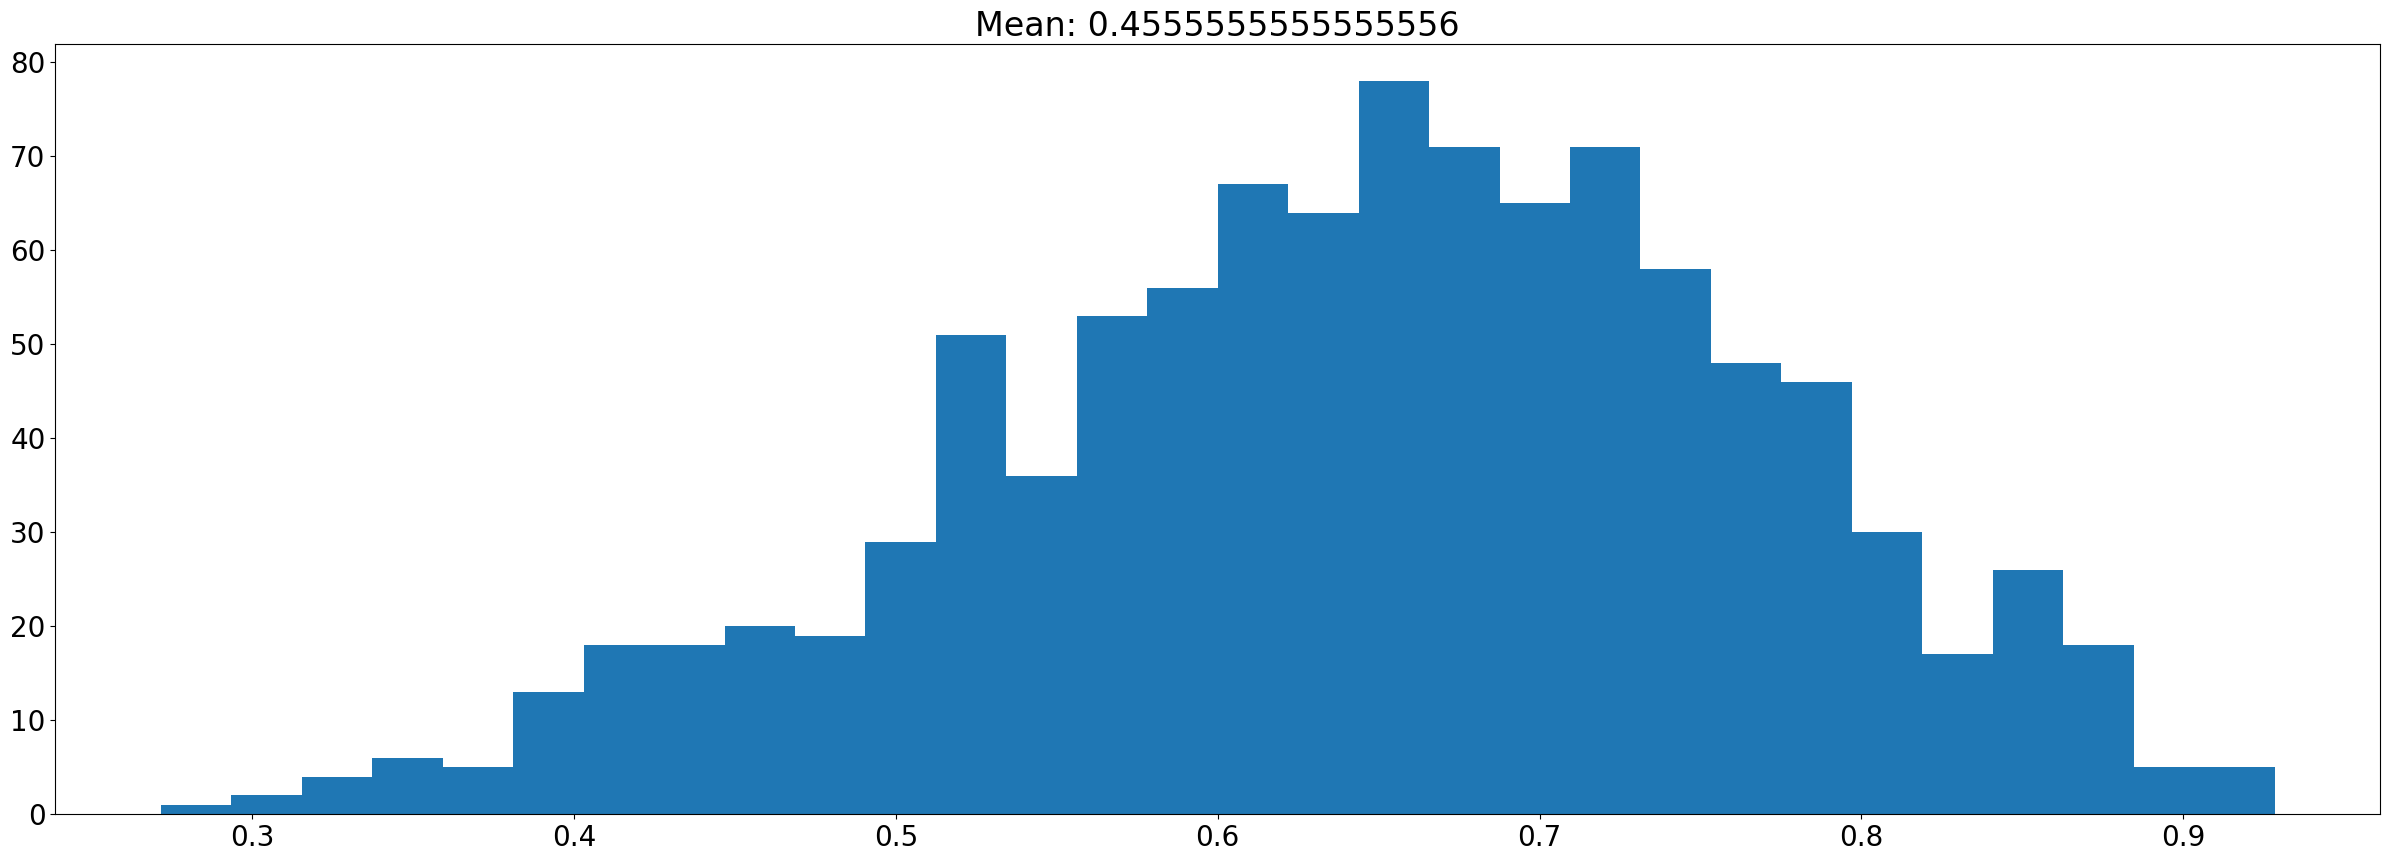

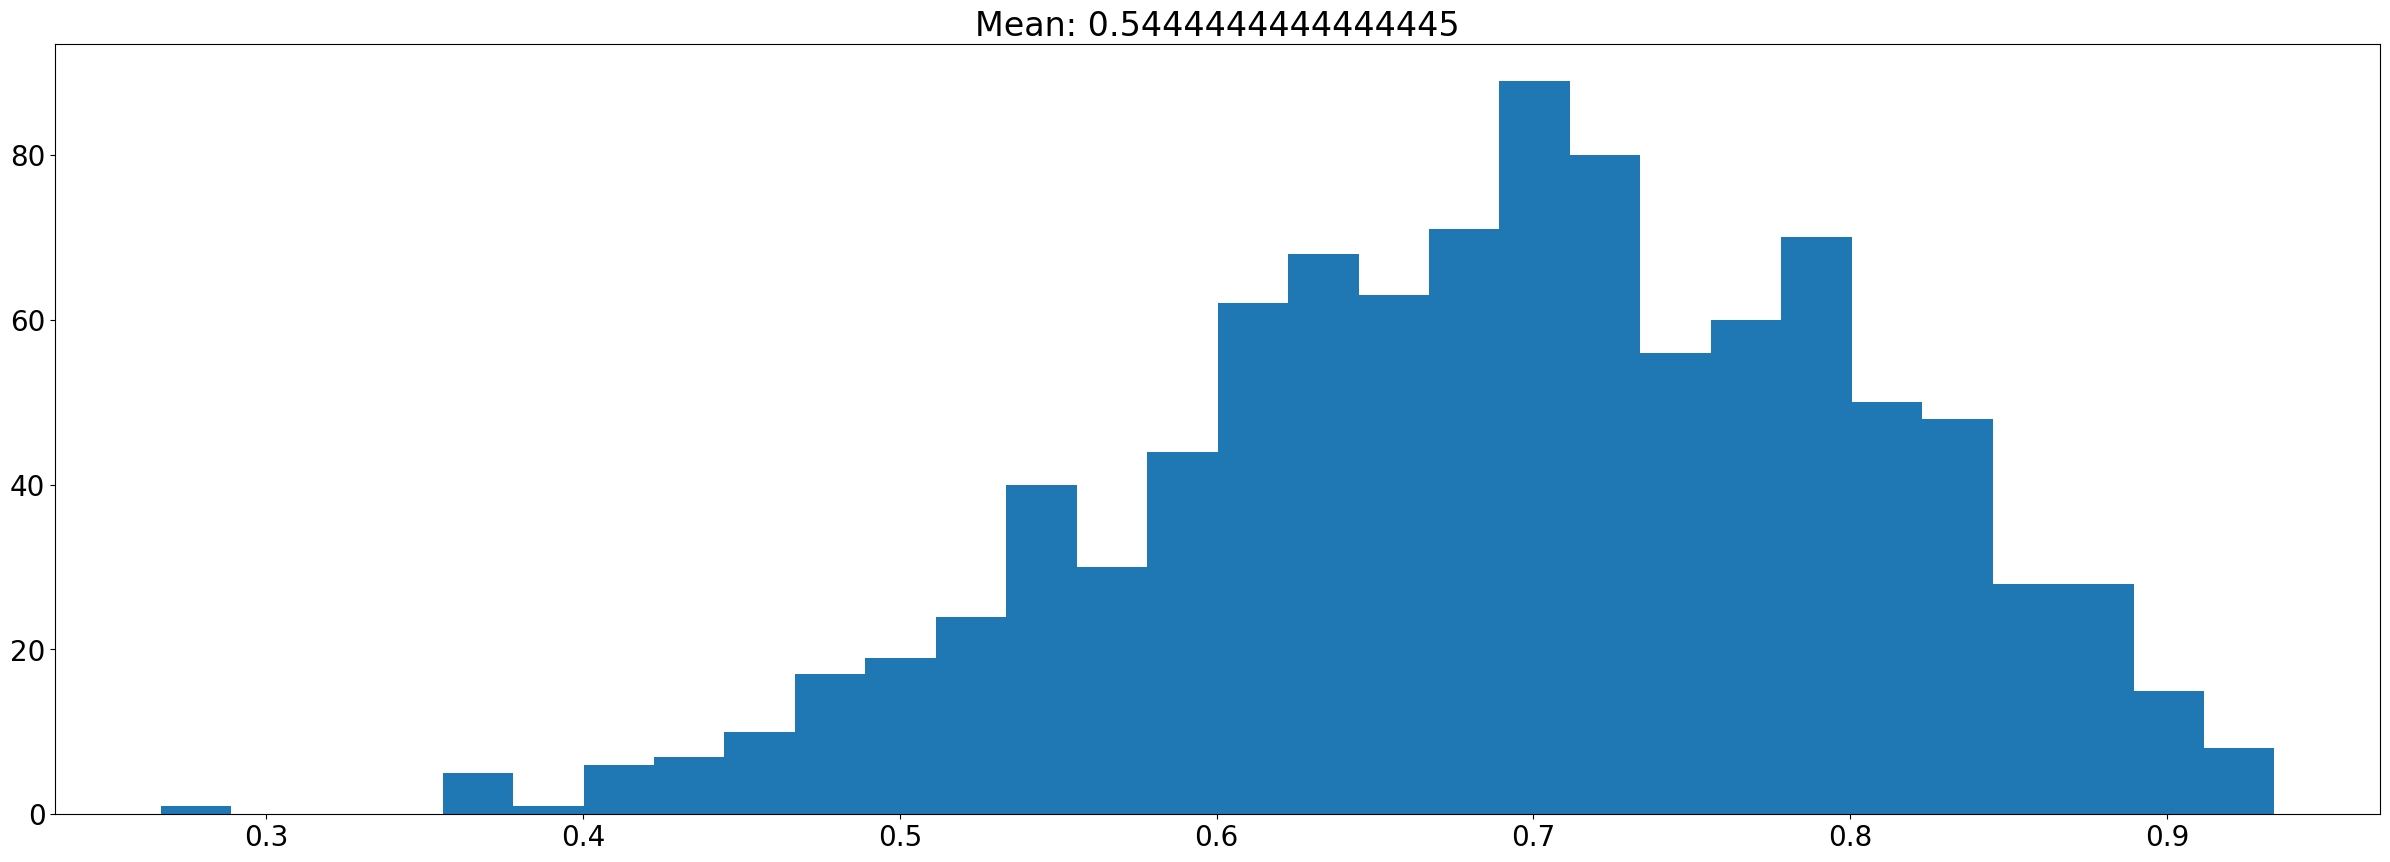

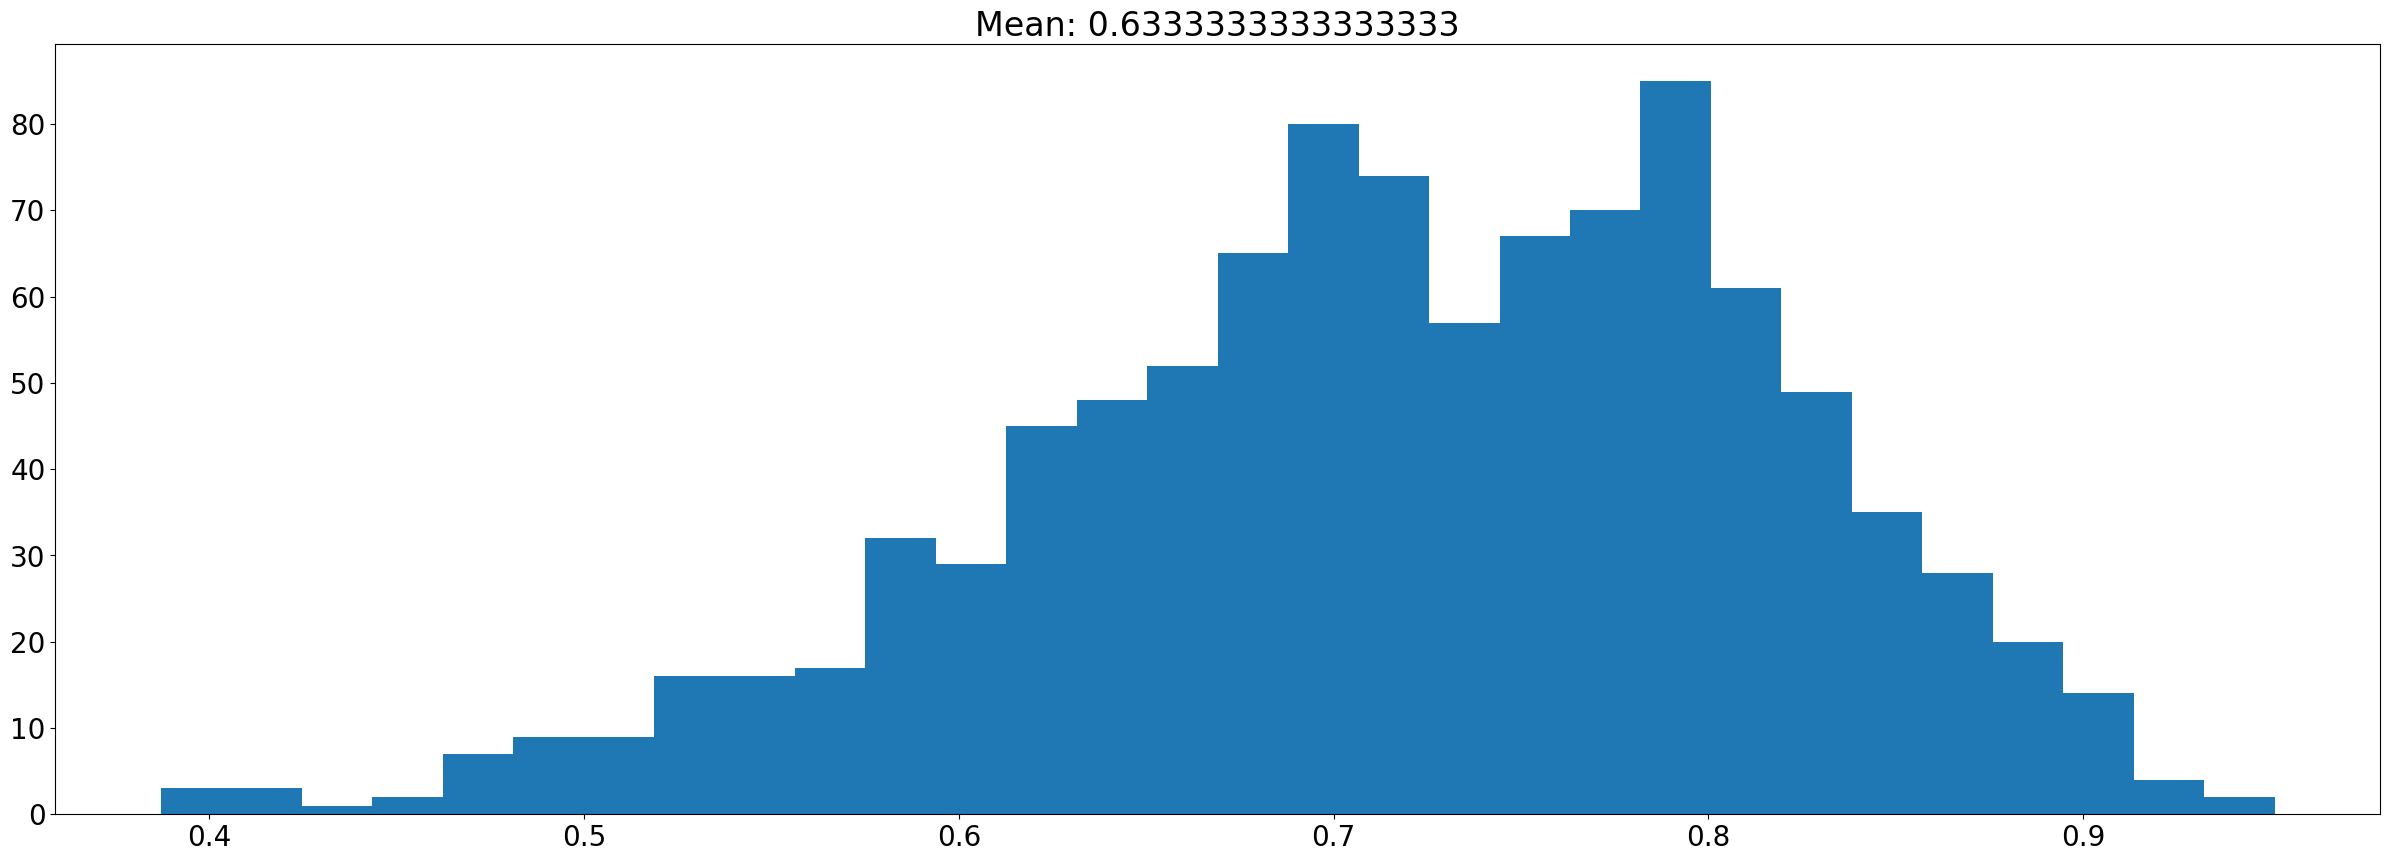

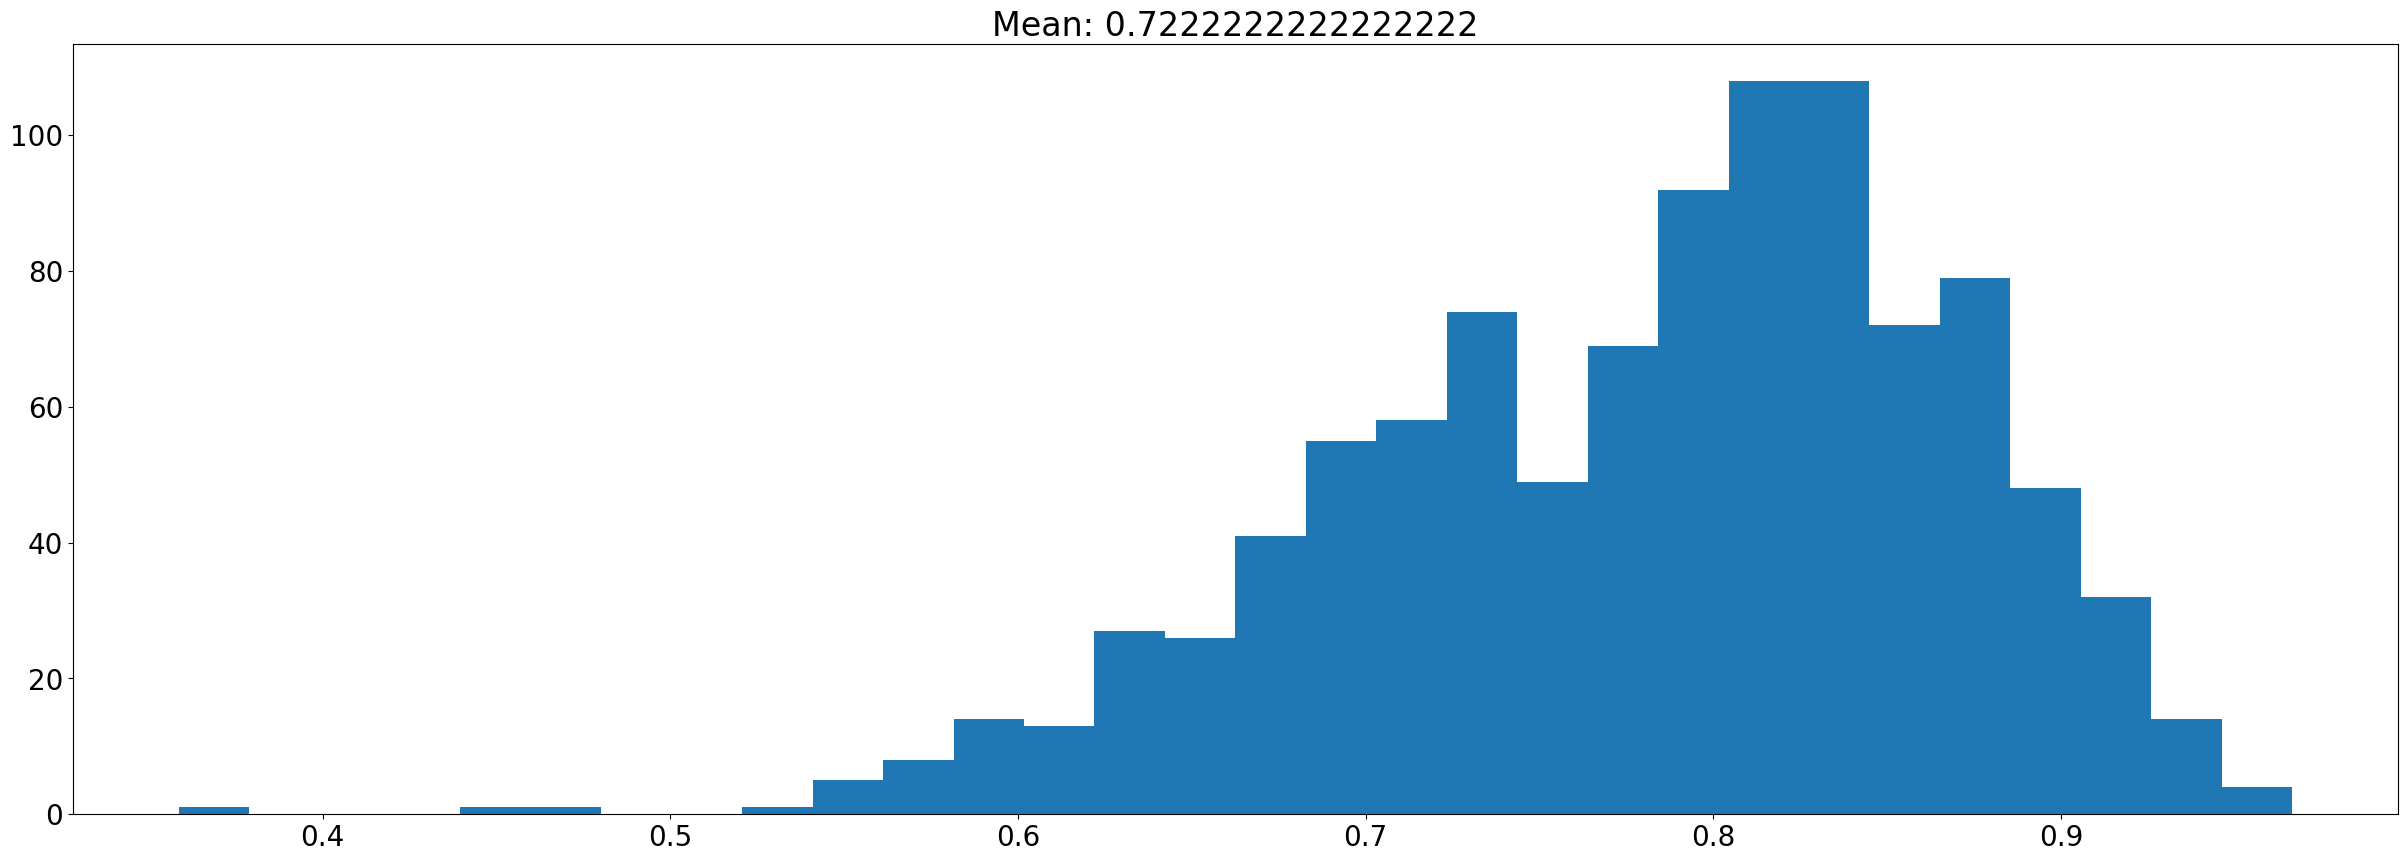

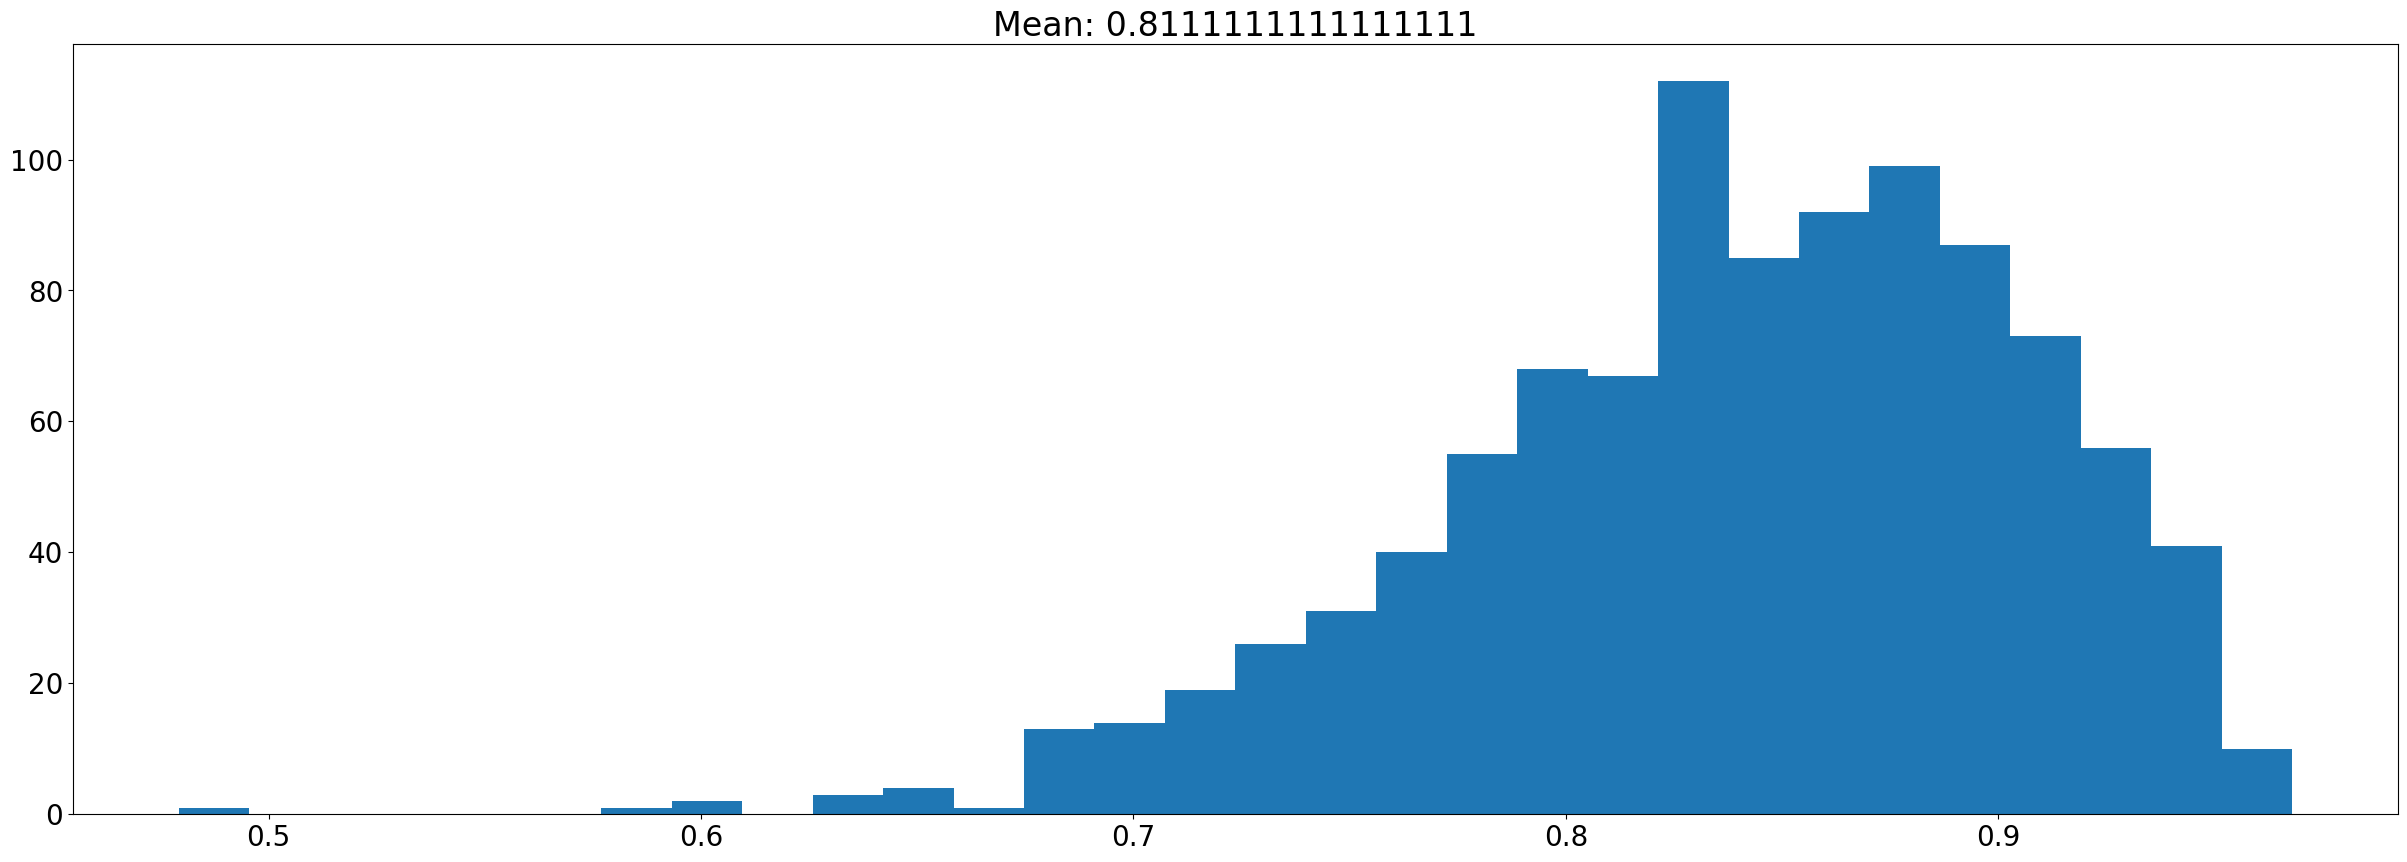

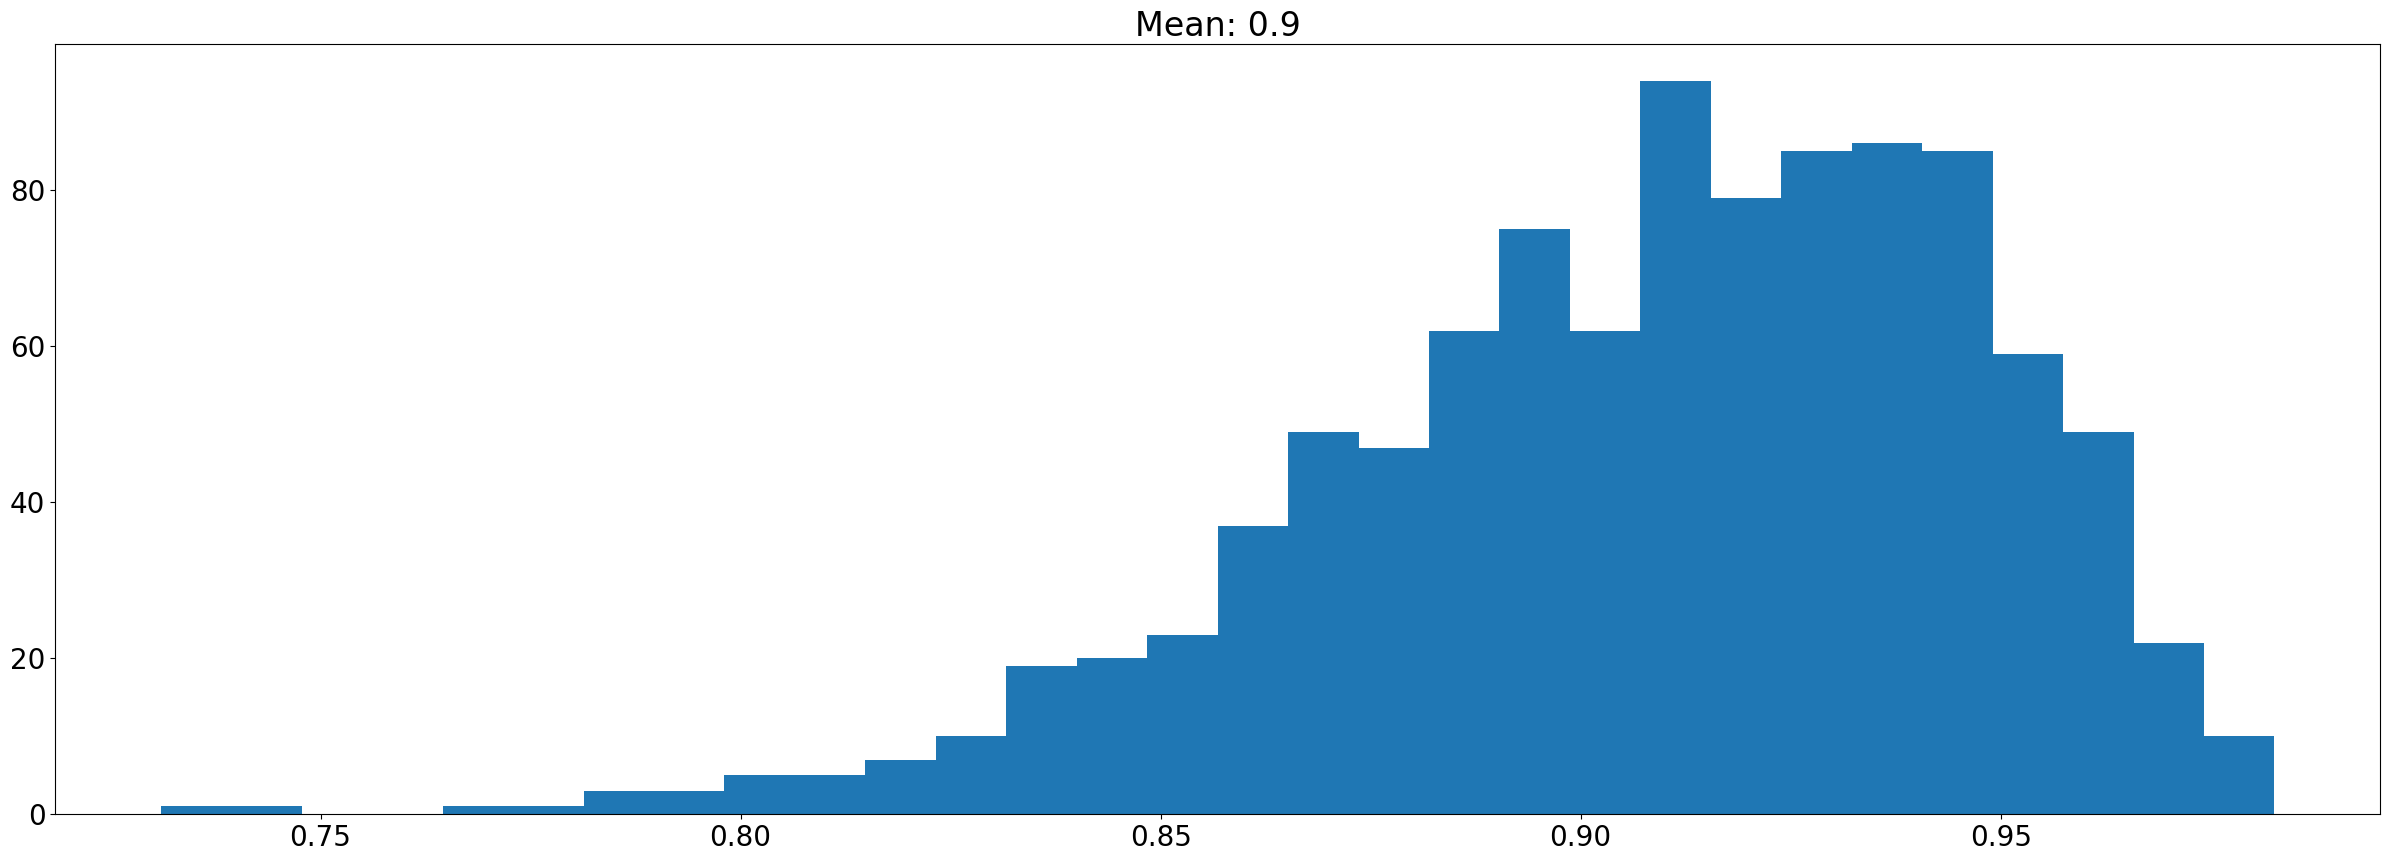

In [12]:
# K-arms with Beta Distribution
# E(X) = a/(a+b)
b = 40
K = 10
actual_means = np.linspace(0.1,0.9,K)
for i in range(K):
    a = actual_means[i]*b/(1-actual_means[i]) # reverse engineer α
    plt.hist(np.random.beta(5/(1-actual_means[i]), 5, 1000), bins = 30)
    plt.title(f'Mean: {a/(a+b)}')
    plt.show()

/var/folders/xt/r947d5fd2yz1_fkptq29sn8r0000gn/T/ipykernel_3346/4032770774.py:8: RuntimeWarning: divide by zero encountered in log
  return np.argmax(mean_vec+ρ*np.power(np.log(np.sum(np.round(times_vec)))/(2*times_vec),0.5))


Period 1, Choice: 0, Reward: 0.025149524824723154, EstMean: 0.025149524824723154, TimesVisited: 1.0
Period 2, Choice: 1, Reward: 0.08250301239158525, EstMean: 0.29125150619579265, TimesVisited: 1.0
Period 3, Choice: 2, Reward: 0.03136324629221978, EstMean: 0.34378774876407325, TimesVisited: 1.0
Period 4, Choice: 3, Reward: 0.23248645881251107, EstMean: 0.43312161470312777, TimesVisited: 1.0
Period 5, Choice: 4, Reward: 0.4077868291380372, EstMean: 0.48155736582760744, TimesVisited: 1.0
Period 6, Choice: 5, Reward: 0.6673605086387128, EstMean: 0.5278934181064522, TimesVisited: 1.0
Period 7, Choice: 6, Reward: 0.6655682176636882, EstMean: 0.523652602523384, TimesVisited: 1.0
Period 8, Choice: 7, Reward: 0.6983453442029983, EstMean: 0.5247931680253748, TimesVisited: 1.0
Period 9, Choice: 8, Reward: 0.8331465225779504, EstMean: 0.5370162802864389, TimesVisited: 1.0
Period 10, Choice: 9, Reward: 0.9351692641426446, EstMean: 0.5435169264142645, TimesVisited: 1.0
Period 11, Choice: 9, Reward:

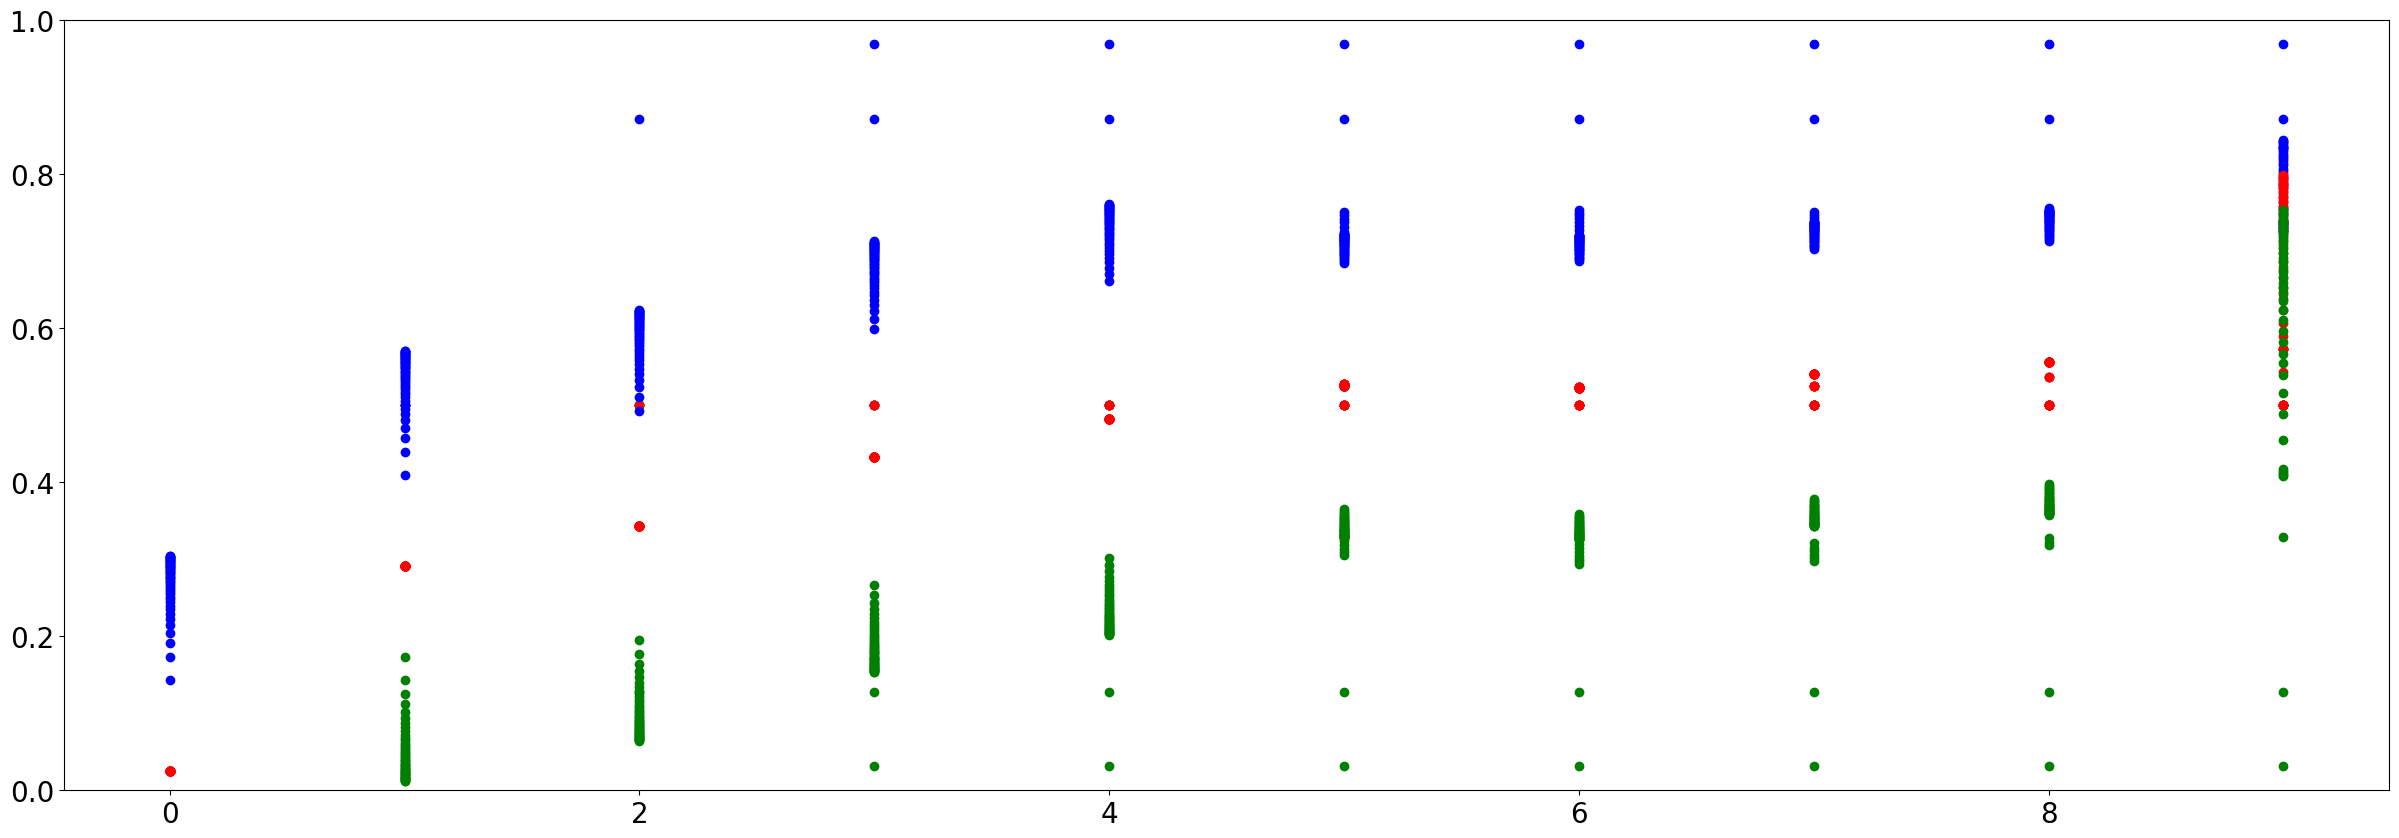

In [13]:
def printCI(mean_vec, times_vec, δ=0.95, K=3, ρ=0.2):
    for i in range(K):
        plt.scatter(i, mean_vec[i],c='r')
        plt.scatter(i, mean_vec[i]+ρ*np.power(np.log(np.sum(np.round(times_vec)))/(2*times_vec[i]),0.5), c='b')
        plt.scatter(i, mean_vec[i]-ρ*np.power(np.log(np.sum(np.round(times_vec)))/(2*times_vec[i]),0.5), c='g')

def scoreUAB(mean_vec, times_vec, ρ=0.2):
    return np.argmax(mean_vec+ρ*np.power(np.log(np.sum(np.round(times_vec)))/(2*times_vec),0.5))
    
def generateReward(i, actual_means, b=5):
    a = actual_means[i]*b/(1-actual_means[i])
    return np.random.beta(a, b) 

# UAB Algorithm
N = 50
K = 10
actual_means = np.linspace(0.1,0.9,K)
est_means = 0.5*np.ones(K)
times = 0.1*np.ones(K)
b = 5
choices = []
for t in range(1, N+1):
    i = scoreUAB(est_means, times) # score and choose
    x = generateReward(i, actual_means, b = 5) # generate reward
    est_means[i] = (t-1)*est_means[i]/t + (1/t)*x # update mean
    times[i] = np.round(times[i] + 1) # updates times visited
    printCI(est_means, times, K=K)
    choices.append(i)
    print(f'Period {t}, Choice: {i}, Reward: {x}, EstMean: {est_means[i]}, TimesVisited: {times[i]}')
plt.ylim([0,1])
plt.show()


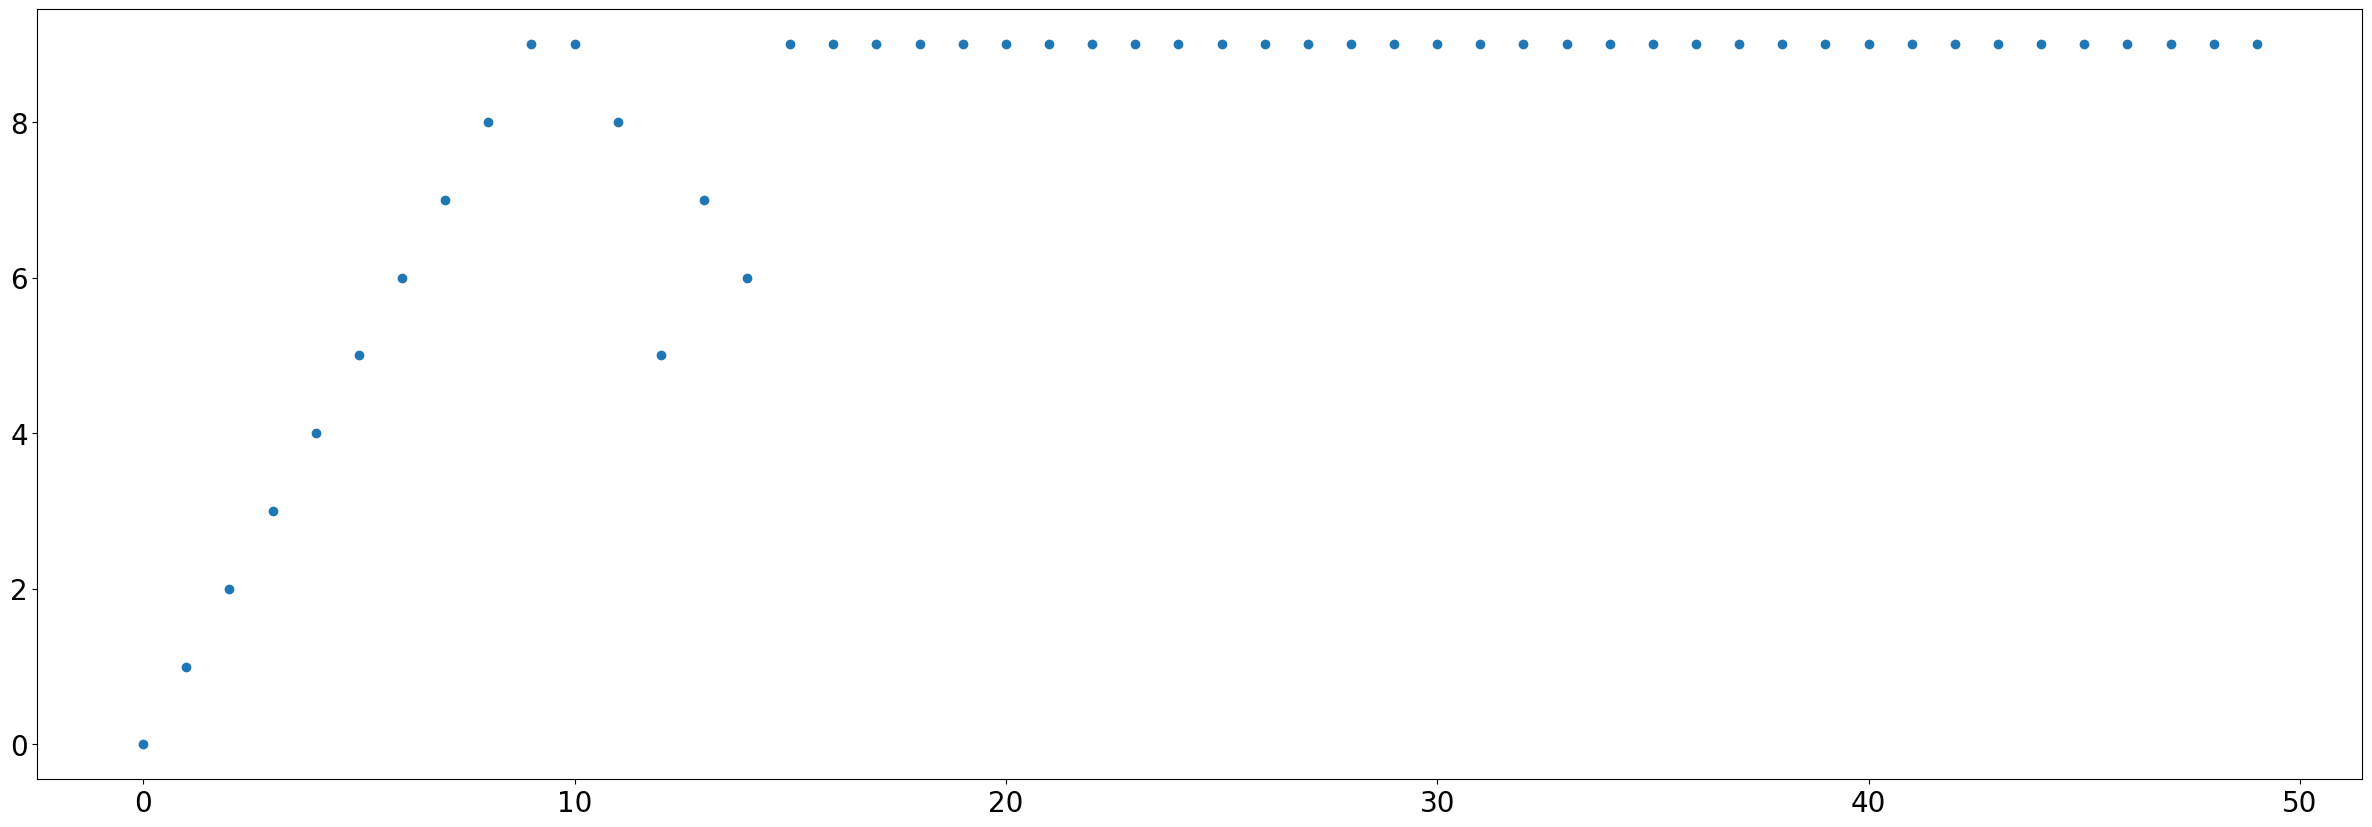

In [14]:
plt.scatter(range(N), choices)

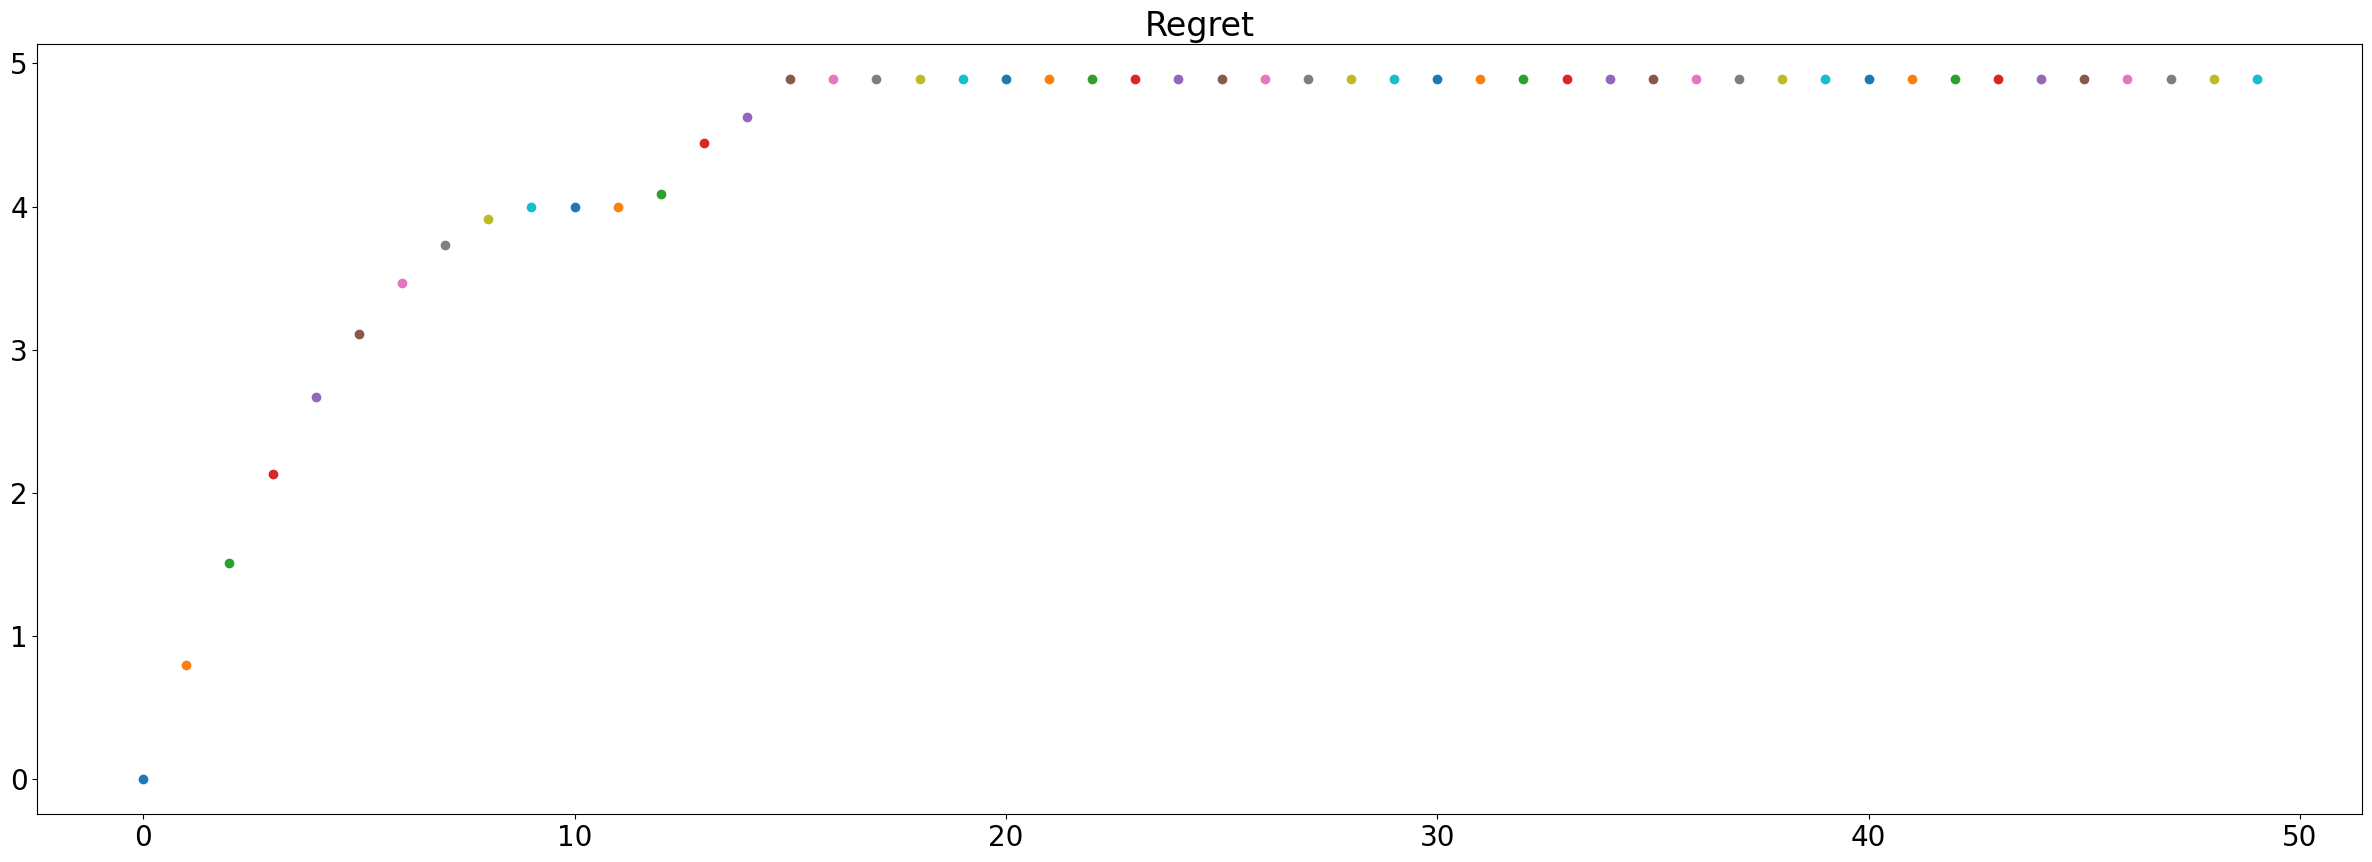

In [15]:
# Regret
def regret(n, actual_means, choices):
    left = np.max(actual_means)*n
    right = 0
    for i in choices[0:n]:
        right += actual_means[i]
    return left - right

for n in range(N):
    plt.scatter(n, regret(n, actual_means, choices))
plt.title('Regret')
plt.show()